In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def read_ecg(filename):
    with open(filename, mode="r") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        result = []
        for row in csv_reader:
            result.append([float(row[0]), float(row[1])])
    return np.array(result)


In [5]:
ecg = read_ecg("AVA02_2017-01-18.csv")
ecg[:, 1] = ecg[:, 1] * -1

In [6]:
ecg[0:30]

array([[5.00000000e-03, 6.96634193e+03],
       [1.00000000e-02, 6.86817456e+03],
       [1.50000000e-02, 6.83211308e+03],
       [2.00000000e-02, 6.92727532e+03],
       [2.50000000e-02, 6.91625654e+03],
       [3.00000000e-02, 6.84313187e+03],
       [3.50000000e-02, 6.82109430e+03],
       [4.00000000e-02, 6.90523775e+03],
       [4.50000000e-02, 6.92126508e+03],
       [5.00000000e-02, 6.83211308e+03],
       [5.50000000e-02, 6.83611991e+03],
       [6.00000000e-02, 6.94530606e+03],
       [6.50000000e-02, 6.93929582e+03],
       [7.00000000e-02, 6.84112845e+03],
       [7.50000000e-02, 6.84513529e+03],
       [8.00000000e-02, 6.96433851e+03],
       [8.50000000e-02, 6.99338804e+03],
       [9.00000000e-02, 7.10457761e+03],
       [9.50000000e-02, 7.44014972e+03],
       [1.00000000e-01, 8.07322905e+03],
       [1.05000000e-01, 8.50696853e+03],
       [1.10000000e-01, 8.42683191e+03],
       [1.15000000e-01, 8.06922222e+03],
       [1.20000000e-01, 7.41610873e+03],
       [1.250000

In [7]:
ecg[:, 0][0:30]

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 ])

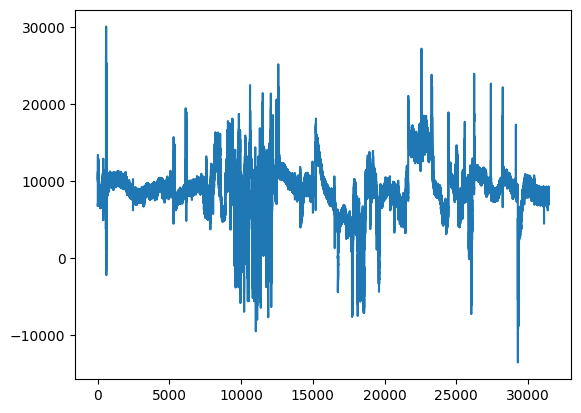

In [8]:
plt.plot(ecg[:, 0], ecg[:, 1])

3144


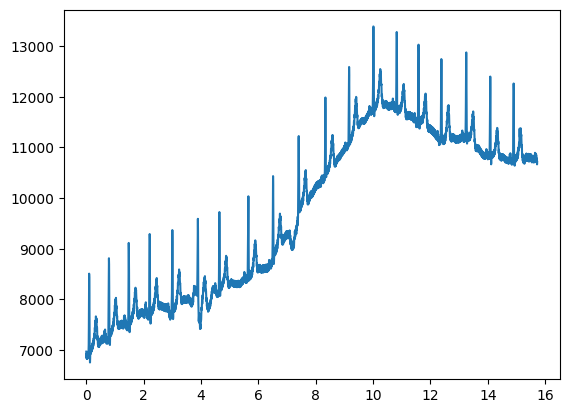

In [9]:
view_length = int(len(ecg) / 2000) # experiment with the denominator
print(view_length)
plt.plot(ecg[:, 0][0:view_length], ecg[:, 1][0:view_length])

## Let's try to separate out one QRS

In [10]:
view_length / 19 

165.47368421052633

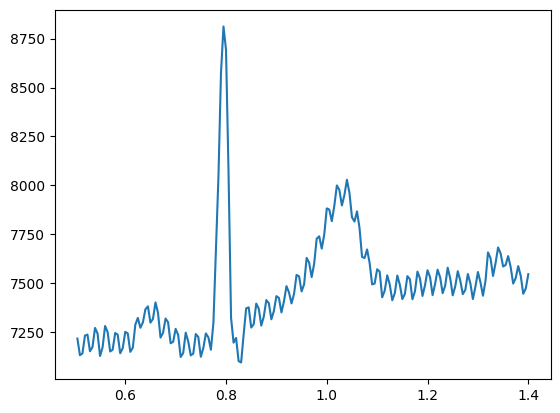

In [11]:
plt.plot(ecg[:, 0][100:280], ecg[:, 1][100:280])

In [12]:
# not quite - need to move to the left

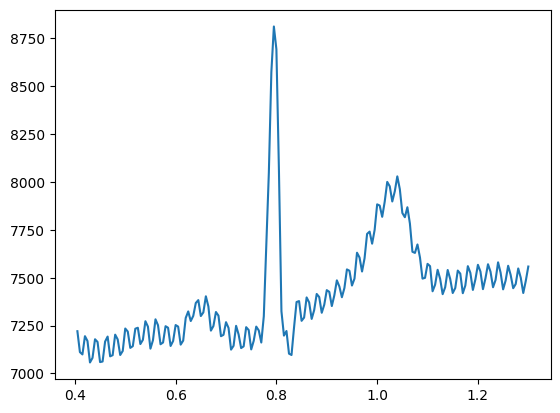

In [13]:
plt.plot(ecg[:, 0][80:260], ecg[:, 1][80: 260])


In [14]:
# frequency, time of qrs
frequency = 250
template_length = int(frequency * 1/2) # first just use frequency, THEN change to frequency times 2/3)
ecg_segment = ecg[0:view_length, [0, 1]]
voltage_segment = ecg_segment[:, 1] # selecting only the voltage
print(voltage_segment)
print(voltage_segment.__len__())
maxima_pos = []
for idx in range(0, int(len(ecg) / 10), template_length):
    segment = voltage_segment[idx: idx + template_length]
    if (len(segment)<1):
        break
    maxima_pos.append(np.argmax(segment))
maxima_pos = (
    np.array(maxima_pos)
    + np.cumsum(np.zeros(len(maxima_pos)) + template_length)
    - template_length
).astype(int) # becuas np.zeros are float

maxima_pos, len(maxima_pos)

[ 6966.341929  6868.174564  6832.113083 ... 10748.7906   10666.65056
 10715.734243]
3144


(array([  20,  158,  296,  442,  600,  647,  778,  928, 1102, 1130, 1302,
        1481, 1530, 1667, 1832, 1999, 2001, 2164, 2316, 2475, 2525, 2649,
        2816, 2979, 3028, 3128]),
 26)

[ 0.105  0.795  1.485  2.215  3.005  3.24   3.895  4.645  5.515  5.655
  6.515  7.41   7.655  8.34   9.165 10.    10.01  10.825 11.585 12.38
 12.63  13.25  14.085 14.9   15.145 15.645]


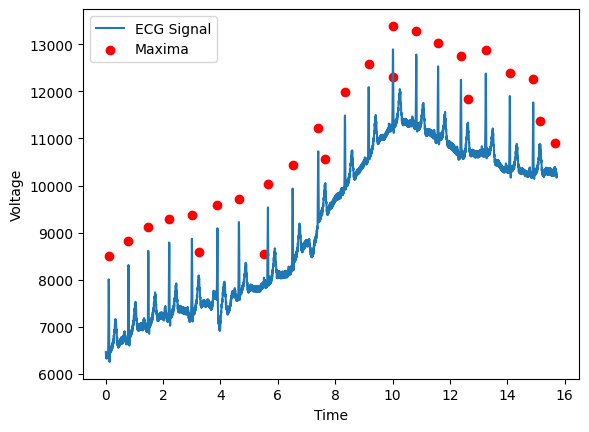

In [15]:
import matplotlib.pyplot as plt

view_length = int(len(ecg) / 2000)  # experiment with the denominator

# Plot time (ecg[:, 0]) vs voltage (ecg[:, 1]) for the first view_length samples
plt.plot(ecg[:, 0][0:view_length], ecg[:, 1][0:view_length] - 500, label="ECG Signal")

# Get maxima positions and plot them
maxima_times = ecg[maxima_pos, 0]  # Time values for maxima
maxima_voltages = ecg[maxima_pos, 1]  # Voltage values for maxima
print(maxima_times)

# Scatter plot for maxima with time on x-axis and voltage on y-axis
plt.scatter(maxima_times, maxima_voltages, color="red", marker="o", label="Maxima")

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()
plt.show()

## Refining the algorithm

In [66]:
def find_peaks(
    ecg,
    frequency,
    view_length,
    proportion=1,
):
    # frequency, time of qrs

    template_length = int(
        frequency * proportion
    )  # first just use frequency, THEN change to frequency times 2/3)
    ecg_segment = ecg[0:view_length, [0, 1]]
    voltage_segment = ecg_segment[:, 1]  # selecting only the voltage
    maxima_pos = []
    ranges = []
    for idx in range(0, int(len(ecg) / 10), template_length):
        segment = voltage_segment[idx : idx + template_length]
        if len(segment) < 1:
            break
        maxima_pos.append(np.argmax(segment))
        ranges.append(np.max(segment) - np.min(segment))
    maxima_pos = (
        np.array(maxima_pos)
        + np.cumsum(np.zeros(len(maxima_pos)) + template_length)
        - template_length
    ).astype(int)  # becuas np.zeros are float
    ranges = np.array(ranges)
    middle_range = (np.max(ranges) - np.min(ranges)) * 1/ 2 + np.min(ranges)
    real_max_pos = maxima_pos[ranges > middle_range]
    return maxima_pos, ranges, real_max_pos

def draw_ecg(ecg, maxima, view_length):
    # Plot time (ecg[:, 0]) vs voltage (ecg[:, 1]) for the first view_length samples
    plt.plot(ecg[:, 0][0:view_length], ecg[:, 1][0:view_length] - 500, label="ECG Signal")
    
    maxima_times = ecg[maxima, 0]  # Time values for maxima
    maxima_voltages = ecg[maxima, 1]  # Voltage values for maxima
    print(maxima_times)

    plt.scatter(maxima_times, maxima_voltages, color="red", marker="o", label="Maxima")

    # Add labels and legend
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.legend()
    plt.show()


MIDDLE RANGE
1240.1142625000002
[1754.992074 1714.923762 1763.005737 1770.017691 1771.019399  748.275731
 2173.705937 1678.862281  301.514049 1661.833248 1888.219212 2251.839145
  736.255236 1766.01086  1871.190179  931.588259 1773.022814 1725.942548
 1657.826417 1699.898145  743.267191 2006.420733 1733.95621  1623.768352
  701.195463  228.38938 ]
[ 0.105  0.795  1.485  2.215  3.005  3.895  4.645  5.655  6.515  7.41
  8.34   9.165 10.01  10.825 11.585 12.38  13.25  14.085 14.9  ]


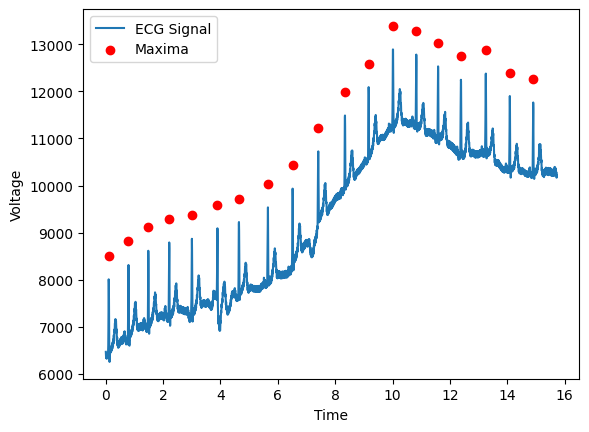

(array([  20,  158,  296,  442,  600,  647,  778,  928, 1102, 1130, 1302,
        1481, 1530, 1667, 1832, 1999, 2001, 2164, 2316, 2475, 2525, 2649,
        2816, 2979, 3028, 3128]),
 array([  20,  158,  296,  442,  600,  778,  928, 1130, 1302, 1481, 1667,
        1832, 2001, 2164, 2316, 2475, 2649, 2816, 2979]))

In [68]:
maxima_pos, ranges, real_max_pos = find_peaks(
    ecg=ecg,
    frequency=frequency,
    view_length=view_length,
    proportion=1 / 2
)

draw_ecg(ecg, real_max_pos, view_length)

maxima_pos, real_max_pos


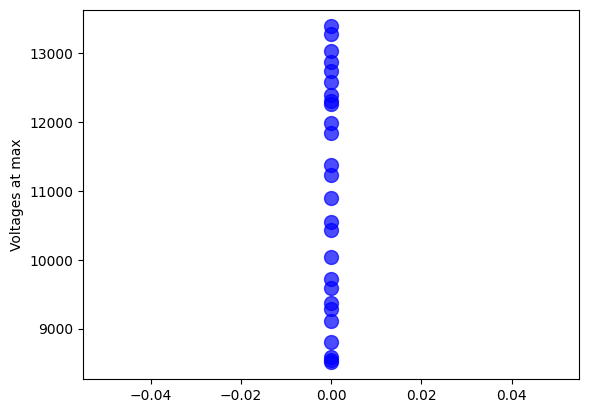

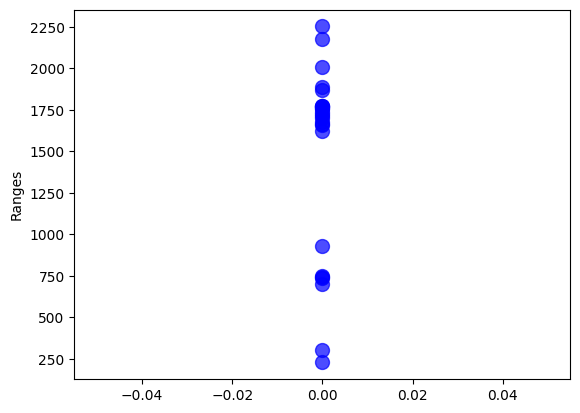

In [44]:

maxima_voltages = ecg[maxima_pos, 1] 
y = [0] * len(maxima_voltages)  

plt.scatter(y, maxima_voltages, color="blue", s=100, alpha=0.7)  # 's' is the marker size


plt.ylabel("Voltages at max")

# Display the plot
plt.show()


y = [0] * len(ranges)

plt.scatter(
    y, ranges, color="blue", s=100, alpha=0.7
)  # 's' is the marker size


plt.ylabel("Ranges")

# Display the plot
plt.show()

1517.5873237499995
[ 0.105  0.795  1.485  2.215  3.005  3.24   3.895  4.645  5.515  5.655
  6.515  7.41   7.655  8.34   9.165 10.    10.01  10.825 11.585 12.38
 12.63  13.25  14.085 14.9   15.145 15.645]


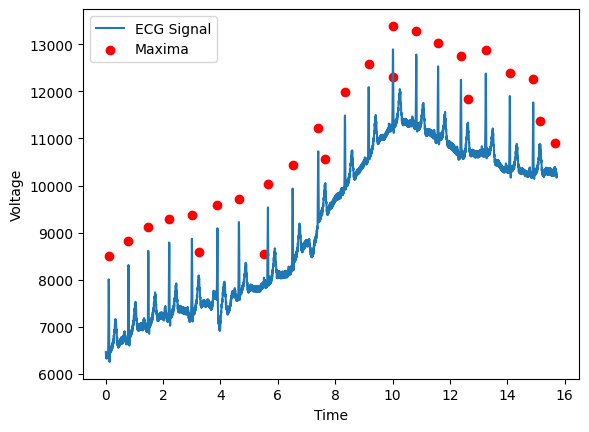

In [55]:
maxima_pos, ranges, real_max_pos = find_peaks(
    ecg=ecg, frequency=frequency, view_length=view_length, proportion=1 / 2
)

draw_ecg(ecg, real_max_pos, view_length)


In [53]:
maxima_pos, real_max_pos

(array([  20,  158,  296,  442,  600,  647,  778,  928, 1102, 1130, 1302,
        1481, 1530, 1667, 1832, 1999, 2001, 2164, 2316, 2475, 2525, 2649,
        2816, 2979, 3028, 3128]),
 array([  20,  158,  296,  442,  600,  778,  928, 1130, 1302, 1481, 1667,
        1832, 2001, 2164, 2316, 2475, 2649, 2816, 2979]))